# Stack Overflow Survey Trends

In [108]:
# import lines
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

## EDA

In [109]:
# load data into a dataframe
df = pd.read_csv('developer_dataset.csv')

# print feature names
print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


/Users/rad/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [110]:
df.head()

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,...,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs,NEWJobHunt,NEWJobHuntResearch,NEWLearn
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,141000.0,NaN,NaN,NaN,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,...,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0,NaN,NaN,NaN
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,...,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN,NaN,NaN,Once a year
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",...,Azure,NaN,NaN,4.0,NaN,48000.0,NaN,NaN,NaN,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0,NaN,NaN,NaN


We can see that there is some **person identifying information** (i.e. 'RespondentID', 'Year', 'Country'), background and **experience information** (e.g.'Employment', 'UndergradMajor','DevType', 'LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith', 'YearsCodePro') and some information about **what they wish to do in the future** (e.g. 'LanguageDesireNextYear','DatabaseDesireNextYear', 'PlatformDesireNextYear'). 

In [111]:
# count the number of values provided in each feature
df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

We can see that there are some features with significantly less entries. This is expected since most questions were optional to fill out.

In [112]:
# display the summary information about each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111209 entries, 0 to 111208
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   RespondentID            111209 non-null  int64  
 1   Year                    111209 non-null  int64  
 2   Country                 111209 non-null  object 
 3   Employment              109425 non-null  object 
 4   UndergradMajor          98453 non-null   object 
 5   DevType                 100433 non-null  object 
 6   LanguageWorkedWith      102018 non-null  object 
 7   LanguageDesireNextYear  96044 non-null   object 
 8   DatabaseWorkedWith      85859 non-null   object 
 9   DatabaseDesireNextYear  74234 non-null   object 
 10  PlatformWorkedWith      91609 non-null   object 
 11  PlatformDesireNextYear  85376 non-null   object 
 12  Hobbyist                68352 non-null   object 
 13  OrgSize                 54804 non-null   object 
 14  YearsCodePro        

The above output shows the entry count as well as the datatype for each feature. We can further investigate this by examining the spread of the numerical features.

In [113]:
# show summary statistics for numerical features
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


Based on the above line of code, we can make a number of key observations:
- the feautures that begin with 'NEW' have the least entries, suggesting that they were added after the other questions (i.e. they were 'NEW'er to the survey)
- based on the features we have there are some interesting insights we can extract: what industry trends do seaonsed developers currently have their eye on (inferred from the skills they intend to work on in the next year); what are the most common/rare languages people are using; and many more
- there may be some erroneous data entries, for example, the maximum WorkWeekHrs is 475, which is greater than the total number of hours in a week

For the columns for which more than ~60% of the data is missing, we may delete these columns because its absence blocks us from making valid inferences using it. 

In [114]:
# each entry has an ID, so count the number of entires it has for total number 
maxRows = df['RespondentID'].count()
 
# print the percentage of data that is missing for each feature
print('% Missing Data:')
print((1 - df.count() / maxRows) * 100)

% Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


In [115]:
# hence we can remove the following features
dropped_features = ['NEWJobHunt','NEWJobHuntResearch','NEWLearn']
df.drop(dropped_features, axis='columns', inplace=True)
print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs'],
      dtype='object')


## Analyse developers by country

In [150]:
# show the number of respondents in each country
df[['RespondentID','Country']].groupby('Country').count()

,RespondentID
Country,
Canada,7993
China,1567
France,5985
Germany,14408
Japan,938
Mexico,1709
Spain,4089
United Kingdom,14328
United States,48958


<AxesSubplot:title={'center':'Number of respondents from each country'}, xlabel='Country'>

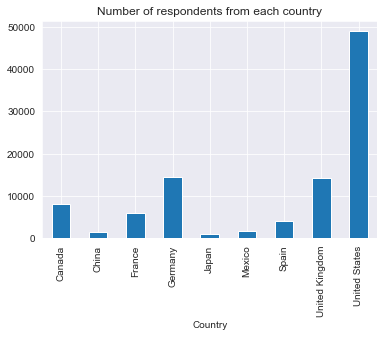

In [149]:
df[['RespondentID','Country']].groupby('Country').count().plot(kind='bar',legend=None,title='Number of respondents from each country')

The countries with the most responses were the United States, Germany and the UK. We wish to analyse how the type of emplyment and developer varies between countries. Before we do so, we must assess what type of missing data we have in each colulmn. We can check this by seeing if there is a general trend of how the data is missing from each column.

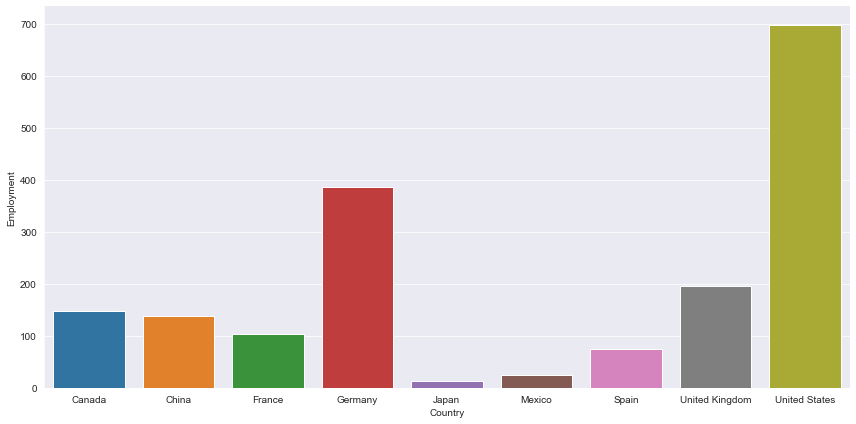

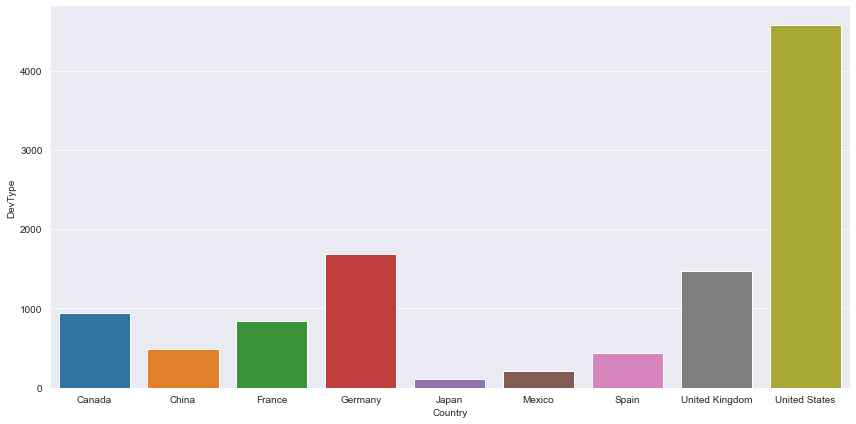

In [117]:
# count the number of missing values in each of the features and assess them according to country
missingData = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()

sns.set_style("darkgrid")
A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2)
B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2)

From the above figure, we can see that the proportions of missing data in both DevType and Employment are similar. We conclude that they are just in proportion to the number of responses from each country, hence there isn't a systematic reason distribution of missing entries, which implies they are missing completely at random.

We remove the missing data using pairwise deletion: that is, deleting the rows with missing data. 

In [118]:
df.dropna(subset = ['Employment','DevType'],
    inplace = True,
    how = 'any')

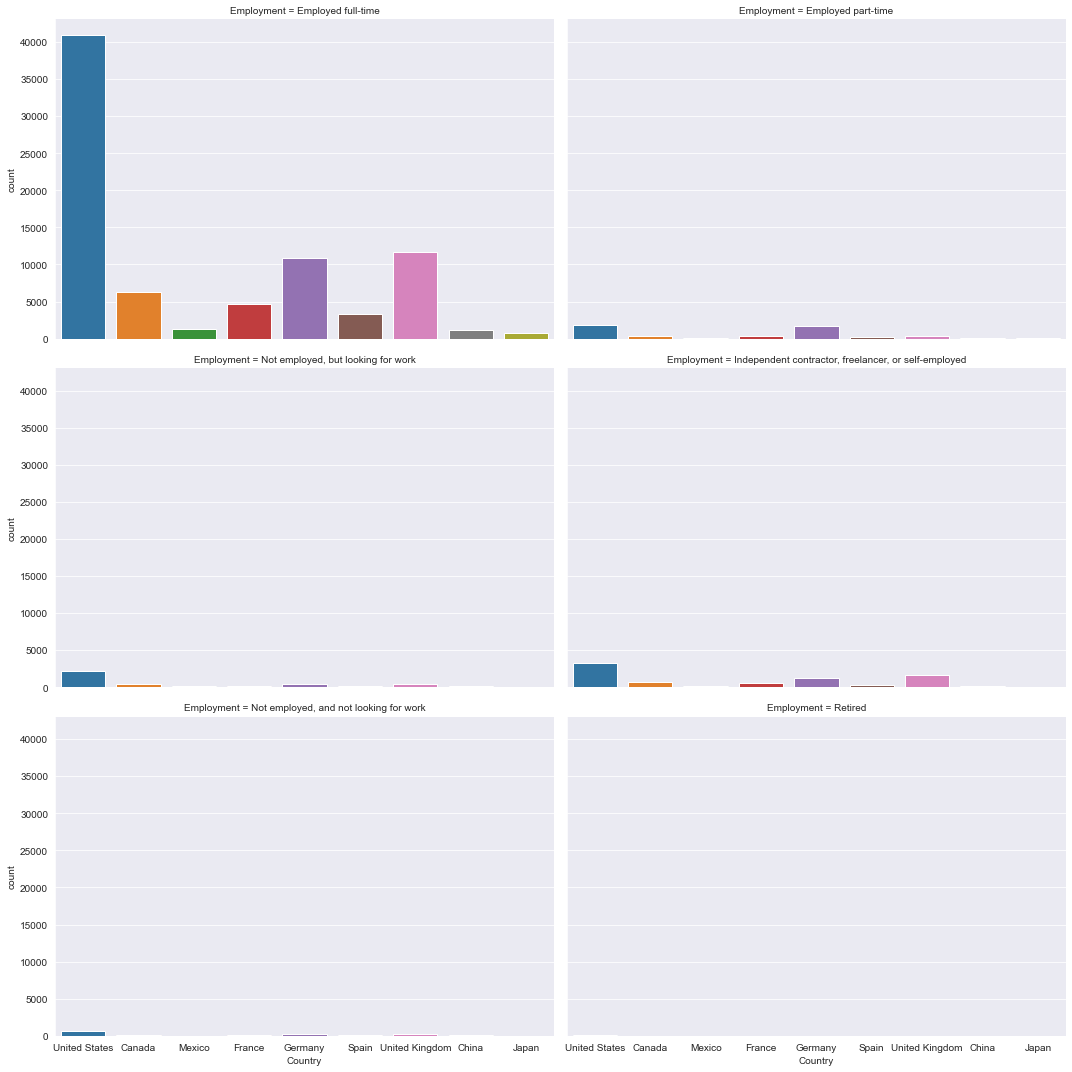

In [119]:
# plot the geographic demography for each employment type
sns.set_style("darkgrid")
empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=5, aspect=1.5,col_wrap=2);

We can see that:
- most respondents are employed full time, with some working part-time or freelancing
- there weren't many retired respondents

/Users/rad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/rad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/rad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

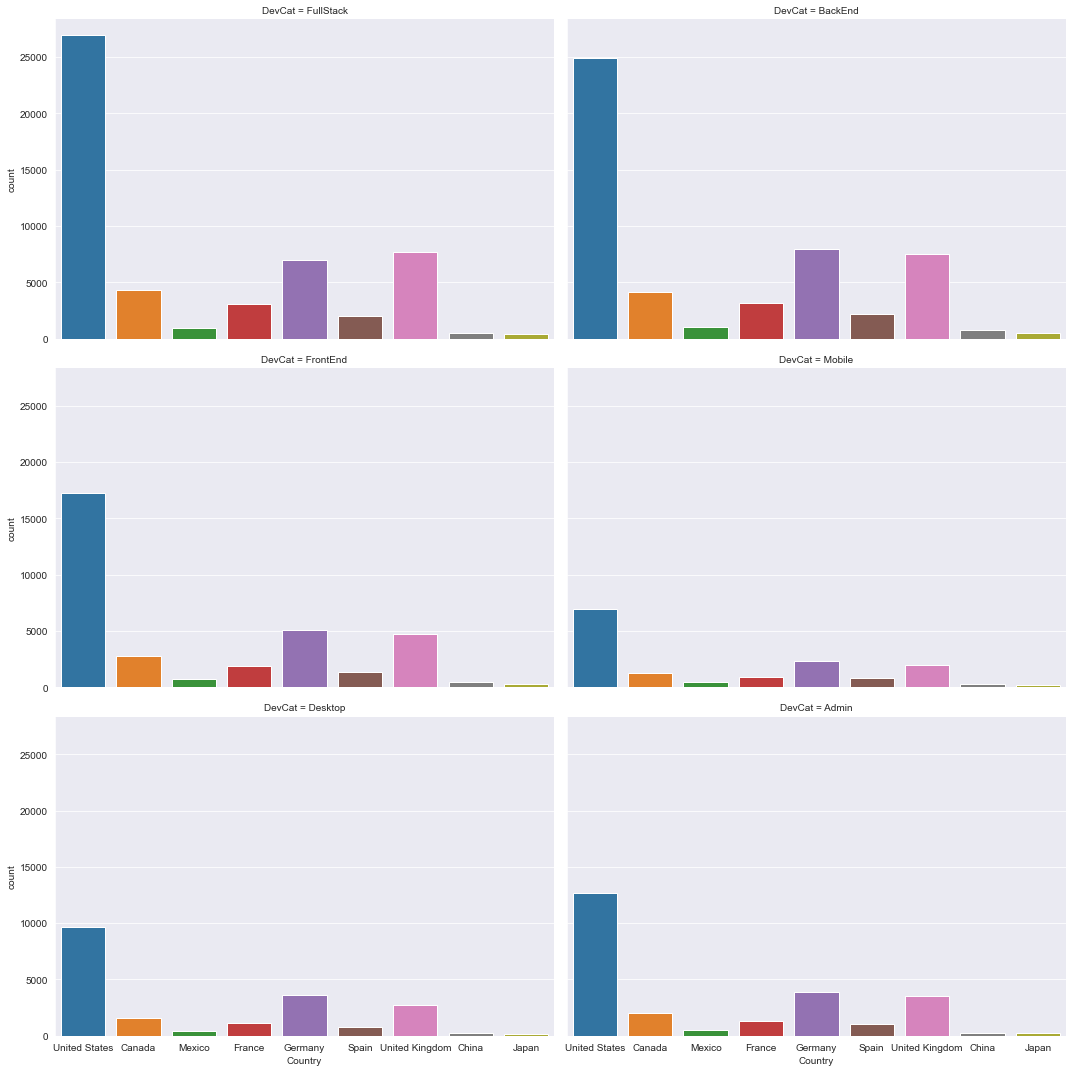

In [120]:
# Key major developer types outlined in the Stack Overflow survey
devTypes = ['BackEnd','FrontEnd','FullStack','Mobile','Desktop','Admin']

# extract the relevant features to be compared
devCatdf = df[['Country','DevType']]
devCatdf.dropna(how='any', inplace=True)

# classify each respondents answer into the develepor types
devCatdf.loc[devCatdf['DevType'].str.contains('(?i)full'), 'FullStack'] = True
devCatdf.loc[devCatdf['DevType'].str.contains('(?i)back'), 'BackEnd'] = True
devCatdf.loc[devCatdf['DevType'].str.contains('(?i)front'), 'FrontEnd'] = True
devCatdf.loc[devCatdf['DevType'].str.contains('(?i)mobile'), 'Mobile'] = True
devCatdf.loc[devCatdf['DevType'].str.contains('(?i)desktop'), 'Desktop'] = True
devCatdf.loc[devCatdf['DevType'].str.contains('(?i)admin|manager'), 'Admin'] = True
# drop the DevType feature as it is no longer needed
devCatdf.drop(labels='DevType',axis='columns',inplace=True)

# rearrange the data so that it is grouped by country and contains the different developr types from above
devCatdf = devCatdf.melt(id_vars='Country',var_name='DevCat')
devCatdf.dropna(how='any', inplace=True) 
devCatdf.drop(labels='value',axis='columns',inplace=True)

# plot the geographic spread for each developer type
sns.set_style("darkgrid")
devCatFig = sns.catplot(x="Country", col="DevCat",
                data=devCatdf, kind="count",
                height=5, aspect=1.5,col_wrap=2);

The above figure plots the developer categories from each country. There was some difficulty producing this plot because many of the respondents entered multple developer types. Therefore, some respondents were accounted for mutiple times. 

Nonetheless, the figure shows that most respondents possess skillsets related front-end, back-end, and fullstack development. There appears not be any correlation between geographic location and skillset, but the US remains the largest job market for all of the developer categories. 

## Examine developers and their undergraduate majors
We wish to examine what majors the developers completed before going into their chosen pathway. From earlier, we know that about 11% of the entries for undergraduate majors is missing. Before deleting them, we analyse if there are any trends behind this absence.  

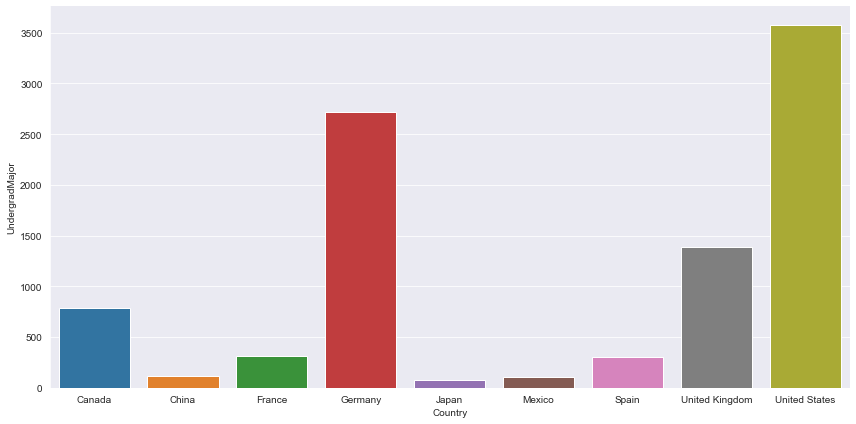

In [151]:
# extract the missing major entries to assess and plot them according to country
missingData = df['UndergradMajor'].isnull().groupby(df['Country']).sum().reset_index()

sns.set_style("darkgrid")
A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="UndergradMajor",
    height = 6, aspect = 2)

We can see that although there are proportionally more absent responses from the surverys from Germany, the proportions still reflect the total response propportions to a satisfactory degree. Hence we will drop the rows missing values (pairwise deletion).

In [153]:
df.dropna(subset = ['UndergradMajor'],
    inplace = True,
    how = 'any') 

Now, we plot the undergrad majors by their develepor type. 

In [179]:
# extrat the features of interest and drop rows with missing values
undergradMajordf = df[['UndergradMajor','DevType']]
undergradMajordf.dropna(how='any', inplace=True)

# categories the developer types and undergraduate majors, then drop those that did not make any of the groups
undergradMajordf.loc[undergradMajordf['DevType'].str.contains('(?i)full'), 'FullStack'] = True
undergradMajordf.loc[undergradMajordf['DevType'].str.contains('(?i)back'), 'BackEnd'] = True
undergradMajordf.loc[undergradMajordf['DevType'].str.contains('(?i)front'), 'FrontEnd'] = True
undergradMajordf.loc[undergradMajordf['DevType'].str.contains('(?i)mobile'), 'Mobile'] = True
undergradMajordf.loc[undergradMajordf['DevType'].str.contains('(?i)desktop'), 'Desktop'] = True
undergradMajordf.loc[undergradMajordf['DevType'].str.contains('(?i)admin|manager'), 'Admin'] = True


undergradMajordf.loc[undergradMajordf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
undergradMajordf.loc[undergradMajordf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
undergradMajordf.loc[undergradMajordf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
undergradMajordf.loc[undergradMajordf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
undergradMajordf.loc[undergradMajordf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
undergradMajordf.loc[undergradMajordf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True


undergradMajordf.dropna(subset = ['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'],
    inplace = True,
    how = 'all') 

# replace the columns of each major as a single column of major categories
undergradMajordf.replace({True: 1}, inplace=True)
undergradMajordf['UndergradMajor'] = undergradMajordf[['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor']].idxmax(1)

# drop the feaure we no longer require and reshape the data as required 
undergradMajordf.drop(labels=['DevType','SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'],axis='columns',inplace=True)
undergradMajordf = undergradMajordf.melt(id_vars='UndergradMajor', var_name='DevCat')
undergradMajordf.dropna(how='any', inplace=True) # redundant combinations will be nans
undergradMajordf.drop(labels='value',axis='columns',inplace=True) # drop the value_vars from the melt

/Users/rad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/rad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

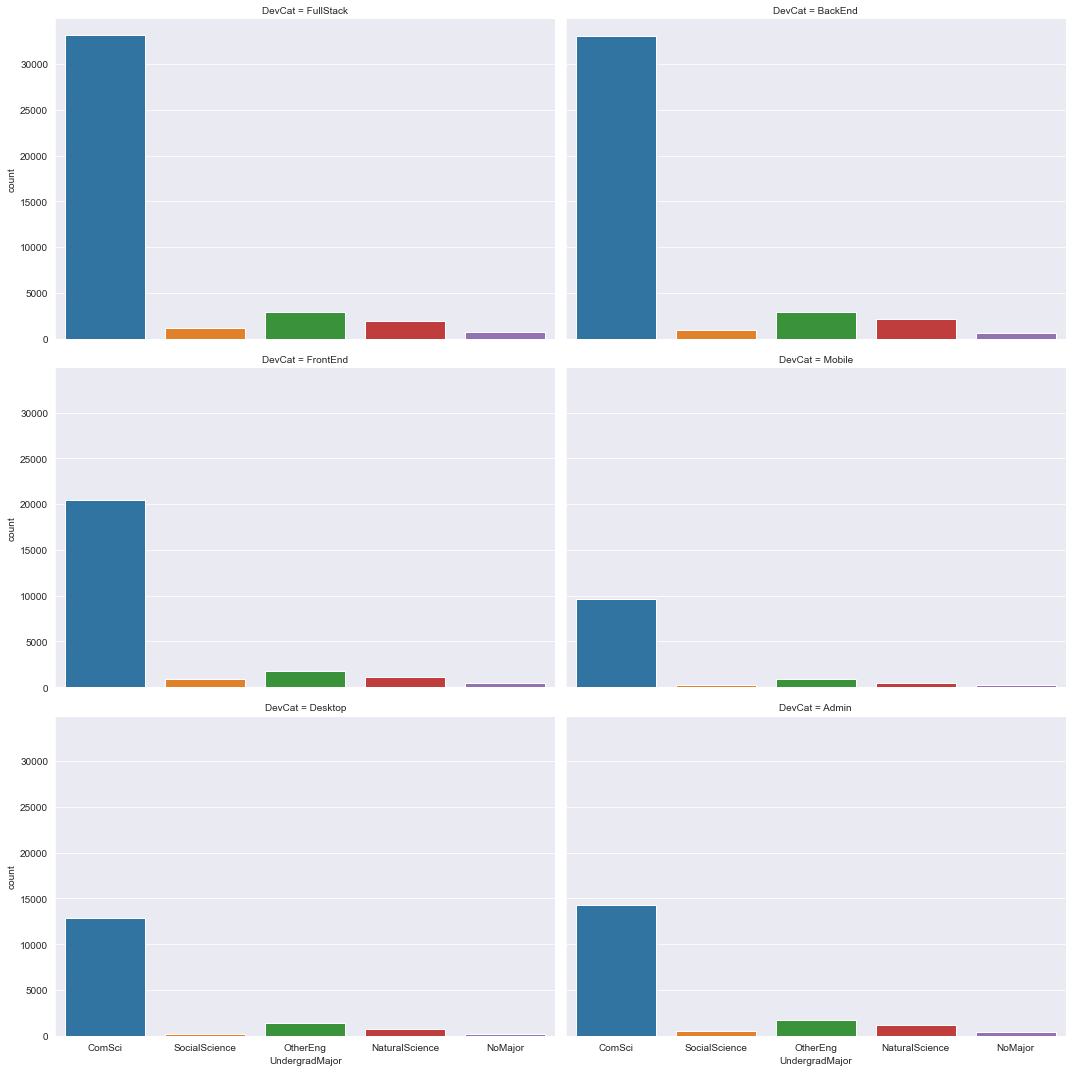

In [184]:
sns.set_style("darkgrid")
# plot the major spreads for each developer type
undergradMajorFig = sns.catplot(x="UndergradMajor", col="DevCat",
                data=undergradMajordf, kind="count",
                height=5, aspect=1.5,col_wrap=2);

We can see that for any developer type the most common major completed was computer science. The figures show that other popular majors to look out for in resumes would be other engineering and natural science majors. 

## Investigate the relationship between years of experience and compensation

The percentage of data missing from the number of years coded and compensation columns are 15% and 18%, respectively. In order to decide how we deal with this missing data, we first examine how the missing entires are distributed over the years that the survery has been conducted.

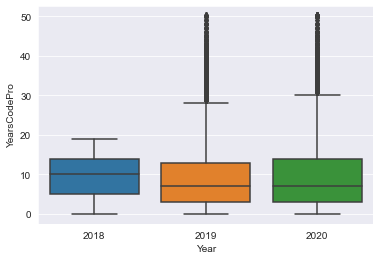

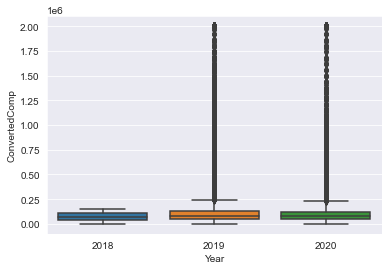

In [188]:
# take the relevant features
compFields = df[['Year','YearsCodePro','ConvertedComp']]
 
# plot the entry spread across the years the survey was conducted 
D = sns.boxplot(x="Year", y="YearsCodePro",
            data=compFields)
plt.show()

E = sns.boxplot(x="Year", y="ConvertedComp",
            data=compFields)
plt.show()


We can see that apart from some outliers, the spread of the compensation and experience appear comparable across the years. We use multiple imputation below to fill in the missing data values.

In [196]:
# take the features to be imputed 
imputedf = df[['YearsCodePro','ConvertedComp']] # both are correlated and have missing values 
 
traindf, testdf = train_test_split(imputedf, train_size=0.1) # take a random sample for training the imputer
 
# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)
 
# Fit the model to the the test dataset
imp.fit(testdf)
 
# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

Next, we analyse the trend of compensation against the number of years coding professionally. 

/Users/rad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='CodeYearBins', ylabel='ConvertedComp'>

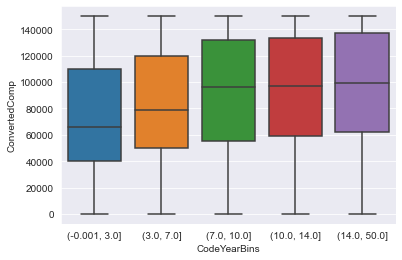

In [197]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000] # remove outliers
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5) # group data into 5 bins 
 
sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf) # plot the box plot of compensation for each bin

<AxesSubplot:xlabel='YearsCodePro', ylabel='ConvertedComp'>

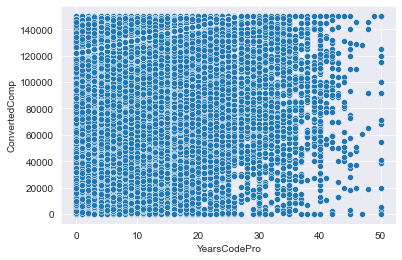

In [203]:
# plot the scatter plot to illustrate the efficacy of the binned boxed plots
sns.scatterplot(x="YearsCodePro", y="ConvertedComp",
            data=compPlotdf)

We can see from the scatter plot that the overwhelming number of entries does not present an interpretable pattern. Instead, since the pay for a professional in any given year will be a spread of numbers, we can analyse the general trend according to bins of the years coded professionally feature. This is shown above as a series of box plots, which illustrate a positive trend as expected. 

## Summary
Our analysis has explored a number of patterns in our datasets including the geographical variation, educational background, and compensation level as it related to years having coded professionally. We have dealt with missing data values is different ways where appropriate. 